In [203]:
import numpy as np
# nelems = 3  # Total number of elements
# nnodes = 8  # Number of global nodes
# dof_per_elem = 24
# vars_per_node = 6
# global_dofs = nnodes*vars_per_node

# # Connectivity from local -> global
# conn = [
#     [0, 1, 2, 3], # Element 1 -> Global nodes 
#     [2, 3, 4, 5], # Element 2 -> Global nodes
#     [4, 5, 6, 7],
# ]

# Octo-garbonzo-mesh 
nelems = 3  # Total number of elements
nnodes = 8  # Number of global nodes
dof_per_elem = 24
vars_per_node = 6
global_dofs = nnodes*vars_per_node

# Connectivity from local -> global
conn = np.random.randint(0, nnodes, size=(nelems, 4))

In [204]:
import numpy as np

# Create fake element stiffness matrix
def Kelem(ndof):
    return np.random.rand(ndof, ndof)


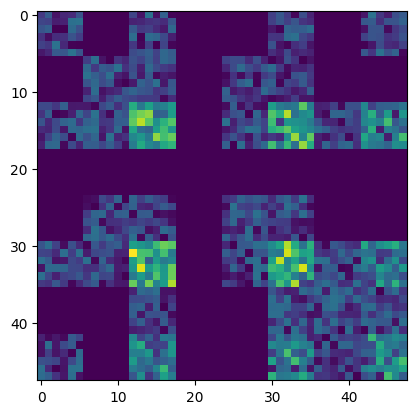

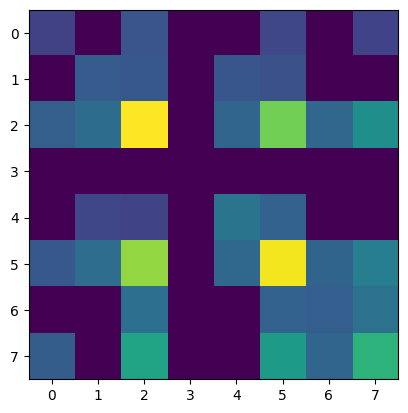

In [205]:
import matplotlib.pyplot as plt

# Assemble dense matrix
dense = np.zeros((global_dofs, global_dofs))
Kelem_list = [Kelem(dof_per_elem) for i in range(nelems)]

for i in range(nelems):
    Kelem_i = Kelem_list[i]
    local_node_conn = conn[i]

    local_dof_conn = [[vars_per_node*inode + idof for idof in range(6)] for inode in local_node_conn]
    local_dof_conn = np.array(local_dof_conn).flatten()

    global_ind = np.ix_(local_dof_conn, local_dof_conn)
    dense[global_ind] += Kelem_i


dense_nodal = np.zeros((nnodes, nnodes))
for i in range(nelems):
    Kelem_i = np.random.rand(4,4) + 1
    local_node_conn = np.array(conn[i])

    global_ind = np.ix_(local_node_conn, local_node_conn)
    dense_nodal[global_ind] += Kelem_i

plt.imshow(dense)
plt.show()
plt.imshow(dense_nodal)
plt.show()
    

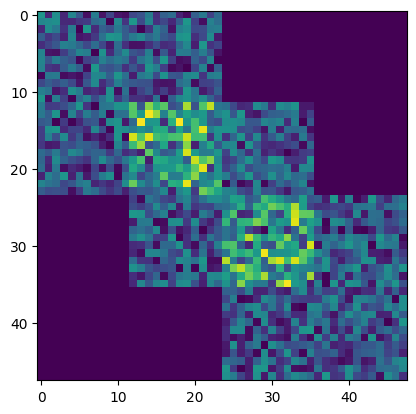

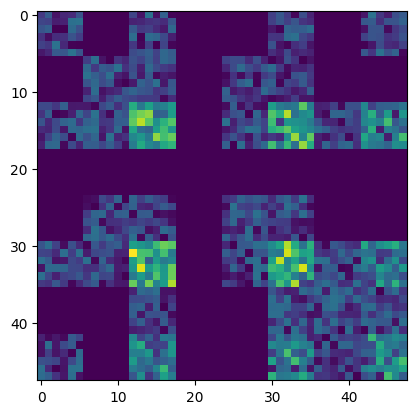

In [206]:
from scipy.sparse import bsr_matrix
# Sparse matrix
blockDim = vars_per_node
mb = nnodes
nnzb = 40

rowPtr = [0, 4, 8, 14, 20, 26, 32, 36, 40]
colPtr = [0, 1, 2, 3] * 2 + [0, 1, 2, 3, 4, 5] * 2 + [2, 3, 4, 5, 6, 7]*2 + [4, 5, 6, 7] * 2
values = np.zeros(nnzb*36)
elem_indx_maps = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17], 
                 [10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29], 
                 [22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],]
    
for e, elem_indx_map in enumerate(elem_indx_maps):
    Kelem_e = Kelem_list[e]

    for block in range(16):
        val_start_indx = 36*elem_indx_map[block]
        block_row = int(block / 4) 
        block_col = int(block % 4)
        current_block = Kelem_e[6*block_row: (6*block_row+6), 6*block_col: (6*block_col+6)]
        values[val_start_indx:val_start_indx+36] += current_block.flatten()

values_scipy = values.reshape((40, 6, 6))



dense_bsr = bsr_matrix((values_scipy,np.array(colPtr),np.array(rowPtr)), shape=(48, 48)).toarray()
plt.imshow(dense_bsr)
plt.show()
plt.imshow(dense)
plt.show()
    